# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from tqdm import tqdm_notebook
from bokeh.palettes import brewer

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=10000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city = data.city_name
    country = data.country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

2279

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_data = {'City' : cities, 'Country' : countries}
city_data_df = pd.DataFrame(city_data)
city_data_df['Lat'] = ''
city_data_df['Lng'] = ''
city_data_df['Temperature (F)'] = ''
city_data_df['Humidity (%)'] = ''
city_data_df['Cloudiness (%)'] = ''
city_data_df['Wind Speed (mph)'] = ''
city_data_df.head(6)

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tete,mz,,,,,,
1,vaini,to,,,,,,
2,saint george,bm,,,,,,
3,arraial do cabo,br,,,,,,
4,bredasdorp,za,,,,,,
5,katsuura,jp,,,,,,


In [4]:
#units = 'Imperial'
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q=saleaula,ws"
#print(query_url)

In [5]:
temp = []
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="
# Loop through the cities_pd and run a lat/long search for each city
for index, row in tqdm_notebook(list(city_data_df.iterrows())):
    
    city = row['City']
    country = row['Country']
    response = requests.get(query_url + city +',' + country).json()
    
    try:
        #print(f"Data is being retieved for {city}, {country}.")
        city_data_df.loc[index, 'Lng'] = response['coord']['lon']
        city_data_df.loc[index, 'Temperature (F)'] = response['main']['temp']
        city_data_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        city_data_df.loc[index, 'Lat'] = response['coord']['lat']
        city_data_df.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        city_data_df.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
    except (KeyError, IndexError):
        #print("Missing field/result... skipping.")
        city_data_df.loc[index, 'Temperature (F)'] = np.nan
        city_data_df.loc[index, 'Humidity (%)'] = np.nan
        city_data_df.loc[index, 'Lat'] = np.nan
        city_data_df.loc[index, 'Lng'] = np.nan
        city_data_df.loc[index, 'Cloudiness (%)'] = np.nan
        city_data_df.loc[index, 'Wind Speed (mph)'] = np.nan

In [6]:
#replace humidity reading over 100% with NaN
for _, row in city_data_df.iterrows():
    if row['Humidity (%)'] > 100:
        row['Humidity (%)'] = np.nan

In [7]:
# Drop Rows with NaN Values
city_data_df = city_data_df.dropna()

In [8]:
# Visualize Data
city_data_df.describe()

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,2012,2012,2012.00,2012.0,2012.0,2012,2012,2012.0
unique,2012,165,1834.00,1931.0,770.0,96,101,562.0
top,ladario,ru,36.62,-76.2,77.0,88,0,4.7
freq,1,278,3.00,3.0,22.0,82,384,110.0


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#Export to CSV file
city_data_df.to_csv('City_Weather.csv', index=False)

In [10]:
city_data_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tete,mz,-16.16,33.59,82.4,42,0,4.7
1,vaini,to,-21.2,-175.2,69.8,64,75,4.7
2,saint george,bm,32.38,-64.68,86.32,70,20,14.99
3,arraial do cabo,br,-22.97,-42.02,72.54,68,40,11.41
4,bredasdorp,za,-34.53,20.04,55.15,66,50,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
# Added due to error with date response from server
try:
    date = pd.to_datetime(response['dt'], unit = 's').strftime('%m-%d-%Y')

except (KeyError, IndexError, ValueError):
    date = 'Date not available'
        

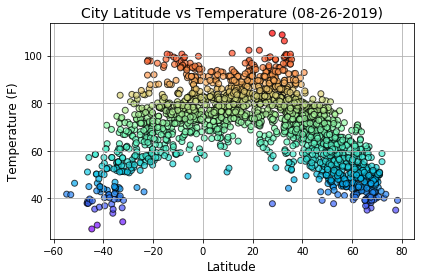

In [13]:
# List of values x_axis values
x_axis = city_data_df['Lat']
data = city_data_df['Temperature (F)']
cmap = ('rainbow')

#Plot scatter
plt.scatter(x_axis, data, marker="o", c=city_data_df['Temperature (F)'], cmap = cmap, edgecolors="black", alpha=0.70)

#Format plot
plt.grid()
plt.xlabel('Latitude', size='12')
plt.ylabel('Temperature (F)', size='12')
plt.title(f"City Latitude vs Temperature ({date})", size='14')
plt.tight_layout()
plt.savefig('LatvTemp')
plt.show()

#### Latitude vs. Humidity Plot

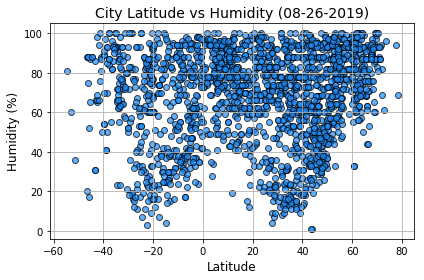

In [14]:
# List of values x_axis values
x_axis = city_data_df['Lat']
data = city_data_df['Humidity (%)']
#color = city_data_df['color']

#Plot scatter
plt.scatter(x_axis, data, marker="o", facecolors= 'dodgerblue' , edgecolors="black", alpha=0.70)

#Format plot
plt.grid()
plt.xlabel('Latitude', size='12')
plt.ylabel('Humidity (%)', size='12')
plt.title(f"City Latitude vs Humidity ({date})", size='14')
plt.tight_layout()
plt.savefig('LatvHum')
plt.show()

#### Latitude vs. Cloudiness Plot

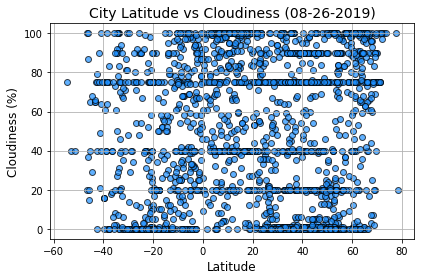

In [15]:
# List of values x_axis values
x_axis = city_data_df['Lat']
data = city_data_df['Cloudiness (%)']
#color = city_data_df['color']

#Plot scatter
plt.scatter(x_axis, data, marker="o", facecolors= 'dodgerblue' , edgecolors="black", alpha=0.70)

#Format plot
plt.grid()
plt.xlabel('Latitude', size='12')
plt.ylabel('Cloudiness (%)', size='12')
plt.title(f"City Latitude vs Cloudiness ({date})", size='14')
plt.tight_layout()
plt.savefig('LatvCloud')
plt.show()

#### Latitude vs. Wind Speed Plot

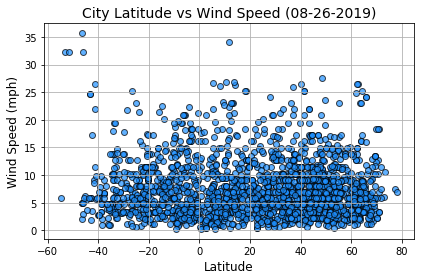

In [16]:
# List of values x_axis values
x_axis = city_data_df['Lat']
data = city_data_df['Wind Speed (mph)']
#color = city_data_df['color']

#Plot scatter
plt.scatter(x_axis, data, marker="o", facecolors= 'dodgerblue' , edgecolors="black", alpha=0.70)

#Format plot
plt.grid()
plt.xlabel('Latitude', size='12')
plt.ylabel('Wind Speed (mph)', size='12')
plt.title(f"City Latitude vs Wind Speed ({date})", size='14')
plt.tight_layout()
plt.savefig('LatvWind')
plt.show()

In [22]:
city_data_df.reset_index(inplace=True)

In [23]:
city_data_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,tete,mz,-16.16,33.59,82.4,42,0,4.7
1,vaini,to,-21.2,-175.2,69.8,64,75,4.7
2,saint george,bm,32.38,-64.68,86.32,70,20,14.99
3,arraial do cabo,br,-22.97,-42.02,72.54,68,40,11.41
4,bredasdorp,za,-34.53,20.04,55.15,66,50,10.29


In [24]:
print(city_data_df.to_html(index=False))

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>City</th>
      <th>Country</th>
      <th>Lat</th>
      <th>Lng</th>
      <th>Temperature (F)</th>
      <th>Humidity (%)</th>
      <th>Cloudiness (%)</th>
      <th>Wind Speed (mph)</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>tete</td>
      <td>mz</td>
      <td>-16.16</td>
      <td>33.59</td>
      <td>82.4</td>
      <td>42</td>
      <td>0</td>
      <td>4.7</td>
    </tr>
    <tr>
      <td>vaini</td>
      <td>to</td>
      <td>-21.2</td>
      <td>-175.2</td>
      <td>69.8</td>
      <td>64</td>
      <td>75</td>
      <td>4.7</td>
    </tr>
    <tr>
      <td>saint george</td>
      <td>bm</td>
      <td>32.38</td>
      <td>-64.68</td>
      <td>86.32</td>
      <td>70</td>
      <td>20</td>
      <td>14.99</td>
    </tr>
    <tr>
      <td>arraial do cabo</td>
      <td>br</td>
      <td>-22.97</td>
      <td>-42.02</td>
      <td>72.54</td>
      <td>68</td>
      <

</table>
